In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [17]:
df_all = pd.read_csv("../../data/50_models_all.csv")
df_IA = pd.read_csv("../../data/50_models_only_IA.csv")

In [ ]:
showmeans=True,
                            color=COLOR_PALLETE, saturation=0.6,

In [45]:
sns.set_palette("pastel")

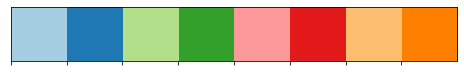

In [48]:
custom_palette = sns.color_palette("Paired", 8)
sns.palplot(custom_palette)

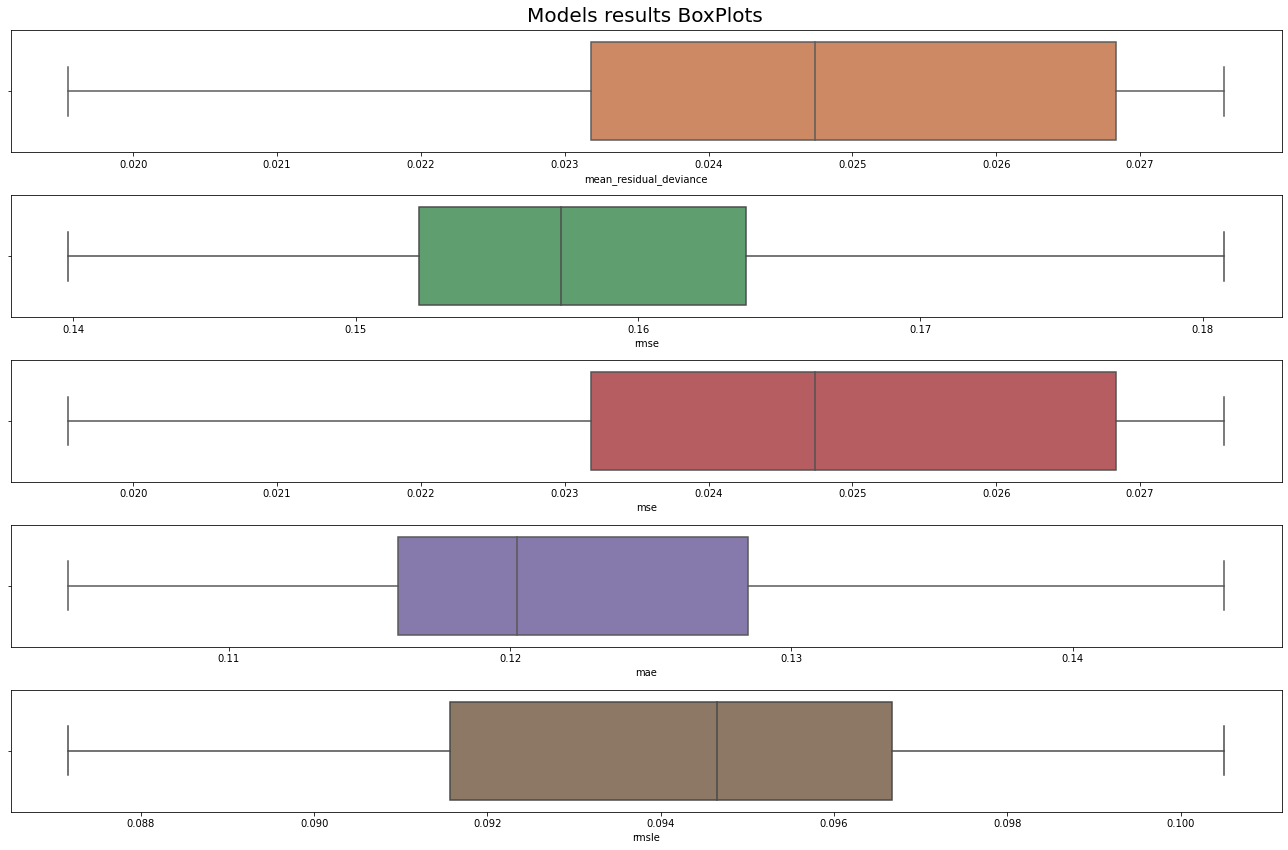

In [62]:
size = (18, 12)
title = "Models results BoxPlots"
fig, axs = plt.subplots(nrows=len(df_all.columns)-1, ncols=1, figsize=size)
fig.suptitle(title, fontsize=20)
custom_palette = sns.color_palette("deep", 8)

for i, col in enumerate(df_all.columns):
    if i == 0:
        continue
    sns.boxplot(
        x=df_all[col],
        showfliers = False,
        color=custom_palette[i],
        ax=axs[i-1]
    )
    fig.tight_layout()

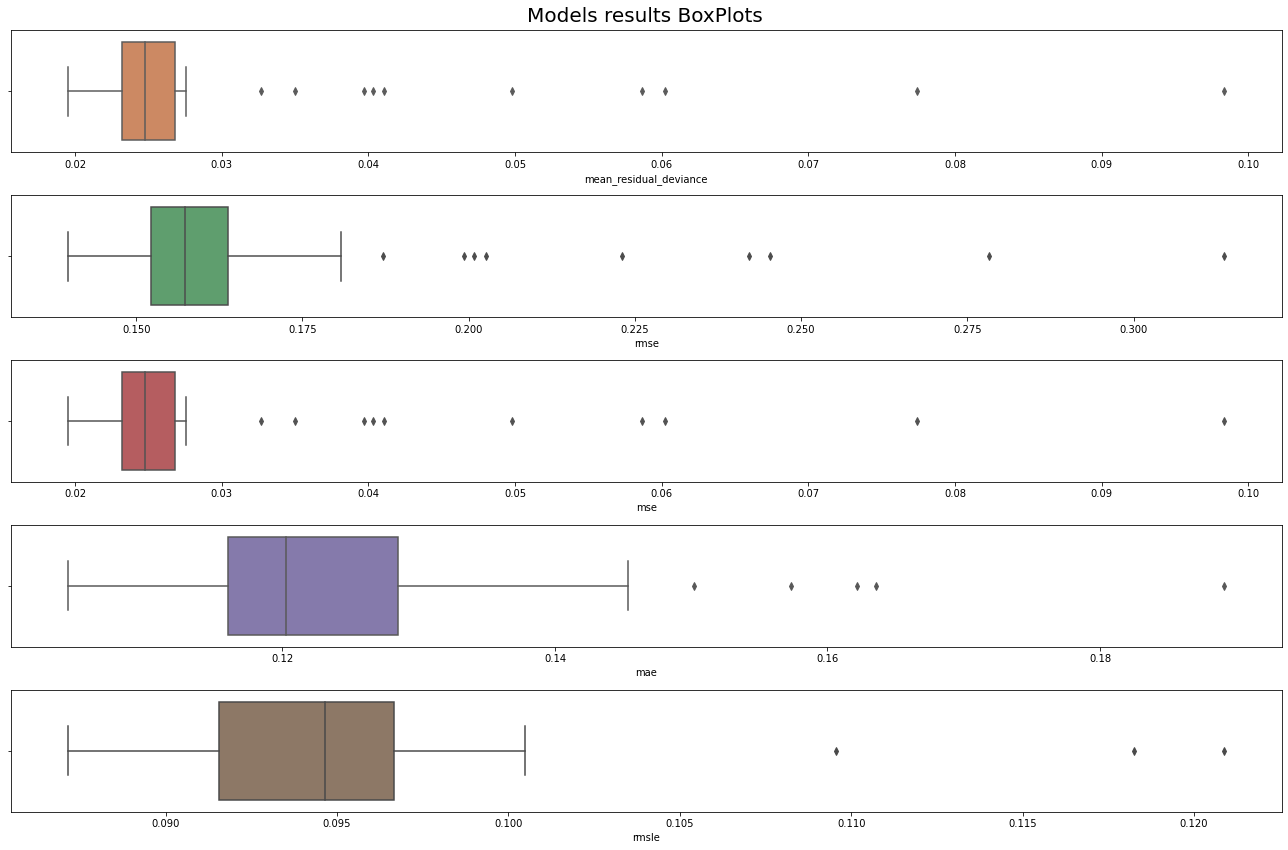

In [61]:
size = (18, 12)
title = "Models results BoxPlots"
fig, axs = plt.subplots(nrows=len(df_all.columns)-1, ncols=1, figsize=size)
fig.suptitle(title, fontsize=20)
custom_palette = sns.color_palette("deep", 8)

for i, col in enumerate(df_all.columns):
    if i == 0:
        continue
    sns.boxplot(
        x=df_all[col],
        showfliers = True,
        color=custom_palette[i],
        ax=axs[i-1]
    )
    fig.tight_layout()